In [63]:
# importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, concatenate, Input

from tensorflow.keras.utils import plot_model

**MNIST dataset**


In [64]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (60000, 28, 28)
x_test :  (10000, 28, 28)
y_train :  (60000,)
y_test :  (10000,)


In [65]:
print(x_train[0].shape)

(28, 28)


PLOTTING DATASET IMAGES

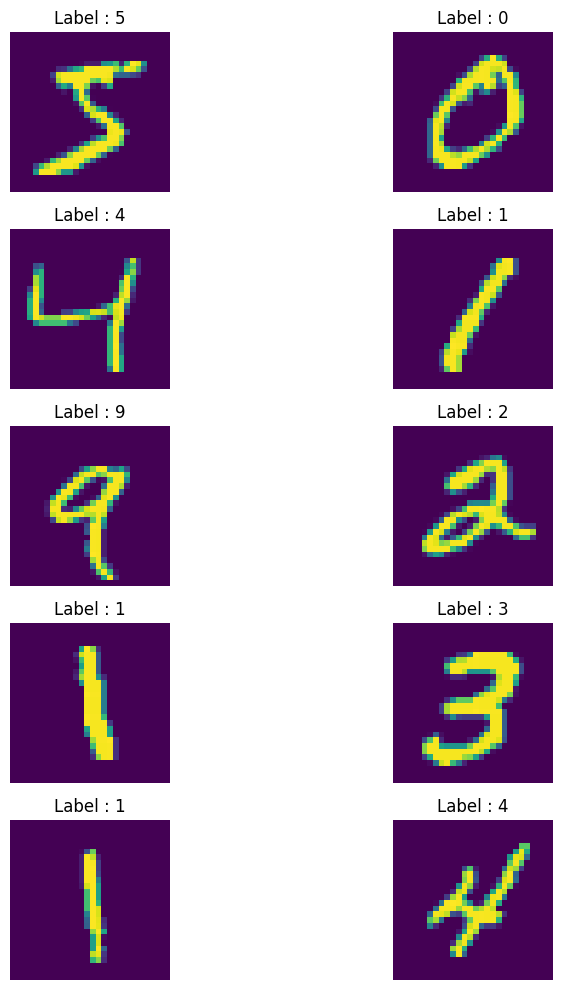

In [66]:
num_images = 10  # Number of images to display

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

for i in range(num_images):
    # Create a subplot in a 5x2 grid
    plt.subplot(5, 2, i + 1)

    # Display the image
    plt.imshow(x_train[i])

    # Remove axis for a cleaner look
    plt.axis('off')

    # Show the corresponding label as title
    plt.title('Label : ' + str(y_train[i]))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
# plt.savefig('mnist_dataset.jpg')

# Show the entire figure
plt.show()

In [67]:
# Reshaping each 28x28 image into a flat vector of size 784 (28 * 28 = 784)
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

print('x_train : ', x_train.shape)
print('x_train_flattened : ', x_train_flattened.shape)
print('x_test : ', x_test.shape)
print('x_test_flattened : ', x_test_flattened.shape)

x_train :  (60000, 28, 28)
x_train_flattened :  (60000, 784)
x_test :  (10000, 28, 28)
x_test_flattened :  (10000, 784)


In [68]:
# Normalizing the data
# The pixel values in the MNIST dataset range from 0 to 255
x_train_flattened = x_train_flattened / 255
x_test_flattened = x_test_flattened / 255

**BUILDING MODEL USING SEQUENTIAL API**

In [69]:
# Initialize the Sequential model
model = Sequential()

# Add the first dense (fully connected) layer with 256 units
# The input shape is 784, corresponding to the flattened 28x28 pixel images
model.add(Dense(784, activation='sigmoid', input_shape=(784,)))

# Add the second dense layer with 256 units
model.add(Dense(512, activation='sigmoid'))

# Add the second dense layer with 256 units
model.add(Dense(256, activation='sigmoid'))

# Add the output layer with 10 units (one for each digit class) and softmax activation
model.add(Dense(10, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
# Compiling the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']     
)

In [71]:
# Model training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7854 - loss: 0.6508
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9566 - loss: 0.1436
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9717 - loss: 0.0922
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9801 - loss: 0.0624
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9861 - loss: 0.0437


In [72]:
# Model evaluation
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9686 - loss: 0.1100


[0.09364024549722672, 0.9728000164031982]

In [73]:
# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,776 (13.18 MB)

 Trainable params: 1,151,258 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,302,518 (8.78 MB)

In [74]:
# predictions
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


predicted label 0


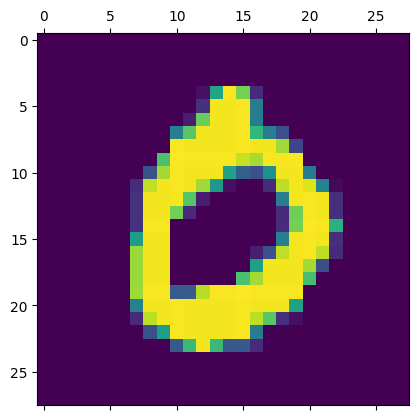

In [75]:
plt.matshow(x_test[3])
print('predicted label', np.argmax(y_predicted[3]))

predicted label 1


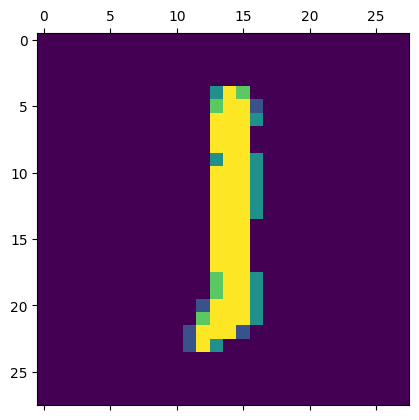

In [76]:
plt.matshow(x_test[14])
print('predicted label', np.argmax(y_predicted[14]))

In [86]:
# Plot the model architecture using matplotlib
# plot_model(model, to_file='sequential_model_plot.jpg', show_shapes=True, show_layer_names=True)

**BUILDING MODEL USING FUNCTIONAL API**

In [79]:
# Define input layer with shape where 784 represents the number of pixels in each image.
input = Input(shape=[784,])

# First hidden layer with 256 neurons and ReLU activation, connected to the input layer.
hidden_layer1 = Dense(256, activation='relu')(input)

# Second hidden layer with 256 neurons and ReLU activation, connected to the first hidden layer.
hidden_layer2 = Dense(256, activation='relu')(hidden_layer1)

# Third hidden layer with 256 neurons and ReLU activation, connected directly to the input layer.
hidden_layer3 = Dense(256, activation='relu')(input)

# Concatenate the outputs of the second and third hidden layers.
concat = concatenate([hidden_layer2, hidden_layer3])

# Output layer with 10 neurons (one for each digit) and softmax activation for multiclass classification.
output = Dense(10, activation='softmax')(concat)


model = Model(inputs=[input], outputs=[output])

# Summary of the model architecture
model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 256)       │    200,960 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 256)       │     65,792 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 256)       │    200,960 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 512)       │          0 │ dense_23[0][0],   │
│ (Concatenate)       │                   │            │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 10)        │      5,130 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 472,842 (1.80 MB)

 Trainable params: 472,842 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(x_train_flattened, y_train, epochs=5, batch_size=512)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8052 - loss: 0.7140
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9530 - loss: 0.1620
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9694 - loss: 0.1042
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9792 - loss: 0.0718
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9842 - loss: 0.0535


In [81]:
# Model evaluation
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9735 - loss: 0.0886


[0.07333119213581085, 0.9767000079154968]

In [82]:
# predictions
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


predicted label 4


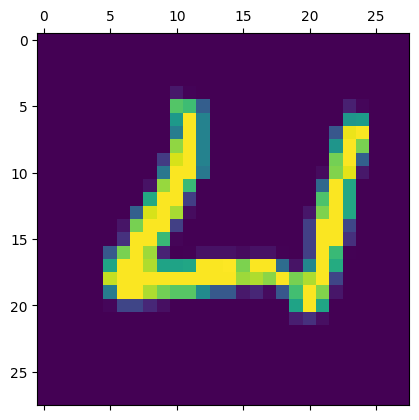

In [83]:
plt.matshow(x_test[33])
print('predicted label', np.argmax(y_predicted[33]))

In [85]:

# Plot the model architecture using matplotlib
# plot_model(model, to_file='functional_model_plot.jpg', show_shapes=True, show_layer_names=True)